# Loading the CSV

In [1]:
import pandas as pd

In [2]:
from prophet import Prophet

In [81]:
from statsmodels.tools.eval_measures import rmse
import warnings

In [17]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.express as px

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/csvs/pune.csv')

In [7]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-12-11 00:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,10,31,72,0.0,1013,18,10,114,5,pune
1,2008-12-11 01:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,9,30,72,0.0,1013,19,10,125,4,pune
2,2008-12-11 02:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,136,4,pune
3,2008-12-11 03:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,147,4,pune
4,2008-12-11 04:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,7,23,68,0.0,1014,20,10,136,4,pune


# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116136 entries, 0 to 116135
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date_time          116136 non-null  object 
 1   maxtempC           116136 non-null  int64  
 2   mintempC           116136 non-null  int64  
 3   totalSnow_cm       116136 non-null  float64
 4   sunHour            116136 non-null  float64
 5   uvIndex            116136 non-null  int64  
 6   moon_illumination  116136 non-null  int64  
 7   moonrise           116136 non-null  object 
 8   moonset            116136 non-null  object 
 9   sunrise            116136 non-null  object 
 10  sunset             116136 non-null  object 
 11  DewPointC          116136 non-null  int64  
 12  FeelsLikeC         116136 non-null  int64  
 13  HeatIndexC         116136 non-null  int64  
 14  WindChillC         116136 non-null  int64  
 15  WindGustKmph       116136 non-null  int64  
 16  cl

In [9]:
# Converting the datetime into the correct data type

df["date_time"] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116136 entries, 0 to 116135
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_time          116136 non-null  datetime64[ns]
 1   maxtempC           116136 non-null  int64         
 2   mintempC           116136 non-null  int64         
 3   totalSnow_cm       116136 non-null  float64       
 4   sunHour            116136 non-null  float64       
 5   uvIndex            116136 non-null  int64         
 6   moon_illumination  116136 non-null  int64         
 7   moonrise           116136 non-null  object        
 8   moonset            116136 non-null  object        
 9   sunrise            116136 non-null  object        
 10  sunset             116136 non-null  object        
 11  DewPointC          116136 non-null  int64         
 12  FeelsLikeC         116136 non-null  int64         
 13  HeatIndexC         116136 non-null  int64   

# Data Exploration

- I am interested in the date_time and tempC columns but let us explore the data with help of some charts and graphs.

In [12]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-12-11 00:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,10,31,72,0.0,1013,18,10,114,5,pune
1,2008-12-11 01:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,9,30,72,0.0,1013,19,10,125,4,pune
2,2008-12-11 02:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,136,4,pune
3,2008-12-11 03:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,147,4,pune
4,2008-12-11 04:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,7,23,68,0.0,1014,20,10,136,4,pune


## Histograms of mean temperature, humidity and pressure

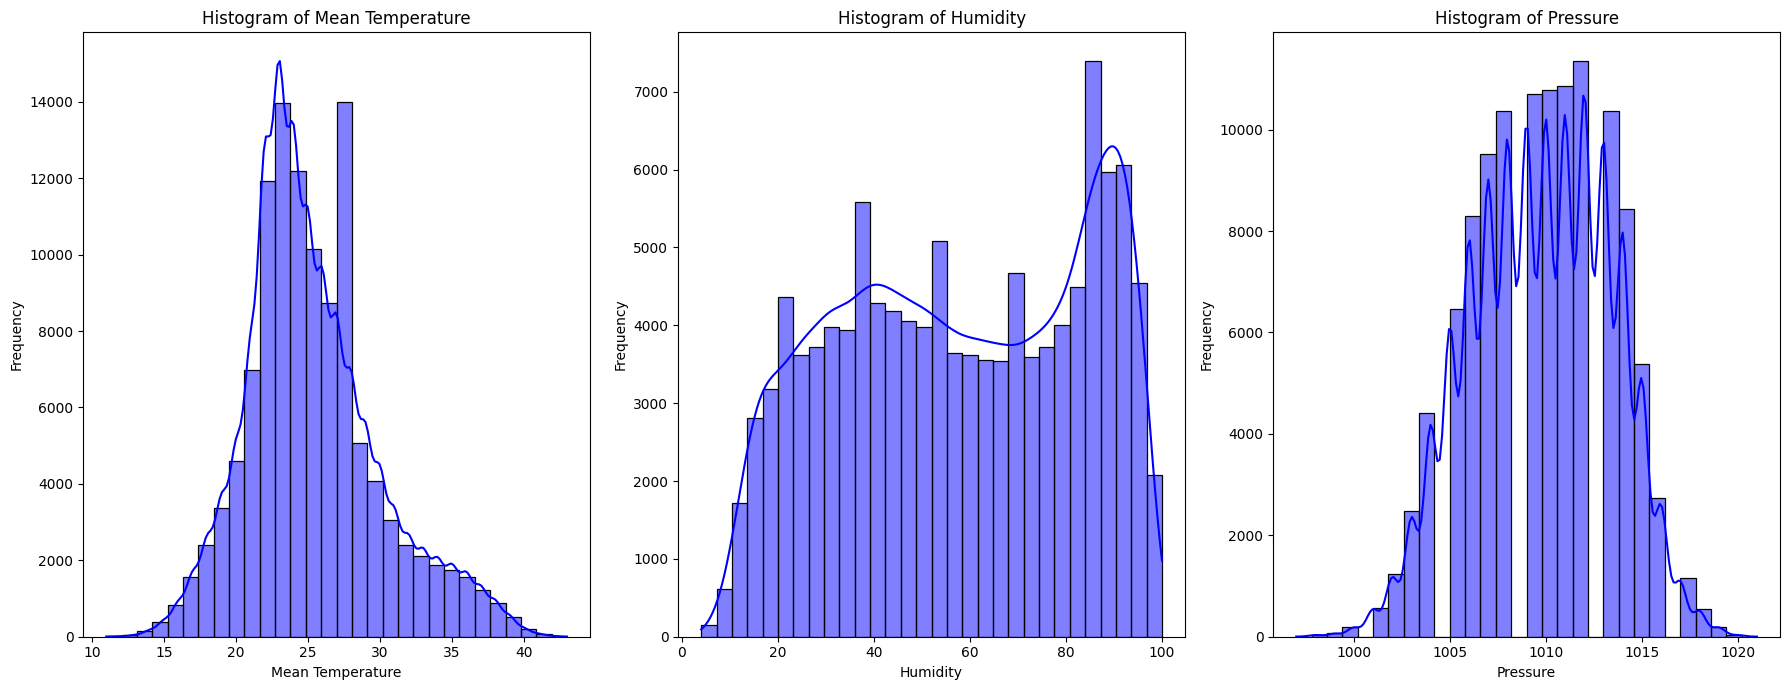

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# (Mean Temperature)
sns.histplot(df['tempC'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel('Mean Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Mean Temperature')

# (Humidity)
sns.histplot(df['humidity'], bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Humidity')

# (Pressure)
sns.histplot(df['pressure'], bins=30, kde=True, color='blue', ax=axes[2])
axes[2].set_xlabel('Pressure')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Pressure')


plt.tight_layout()

plt.show()

## Box plot of mean temperature

In [24]:
fig = px.box(df, y='tempC', title='Boxplot of Mean Temperature', color_discrete_sequence=['skyblue'])
fig.update_layout(
    yaxis_title='Mean Temperature',
    xaxis_title='Box Plot of Mean Temperature',
    width=800,
    height=600
)
fig.show()

## Heatmap

In [31]:
df_heatmap = df[["windspeedKmph","humidity","pressure","tempC"]]
df_heatmap

,windspeedKmph,humidity,pressure,tempC
0,5,72,1013,18
1,4,72,1013,19
2,4,72,1013,18
3,4,72,1013,18
4,4,68,1014,20
...,...,...,...,...
116131,7,28,1009,30
116132,9,29,1010,29
116133,12,30,1012,27
116134,11,31,1011,26


In [35]:
corr_matrix = df_heatmap.corr()


fig = px.imshow(corr_matrix,
                text_auto=True,
                labels={'color':'Correlation'},
                x=['humidity', 'pressure', 'tempC', 'windspeedKmph'],
                y=['humidity', 'pressure', 'tempC', 'windspeedKmph'],
                title='Heatmap of Humidity, Pressure, Temperature, and Wind Speed')


fig.show()

# Resampling the df

In [44]:
df.set_index('date_time', inplace=True)

In [56]:
daily_df = df.resample('D').sum()

In [57]:
daily_df = daily_df[["tempC"]]
daily_df

,tempC
date_time,
2008-12-11,571
2008-12-12,589
2008-12-13,586
2008-12-14,567
2008-12-15,554
...,...
2022-03-07,684
2022-03-08,681
2022-03-09,670


<Axes: xlabel='date_time'>

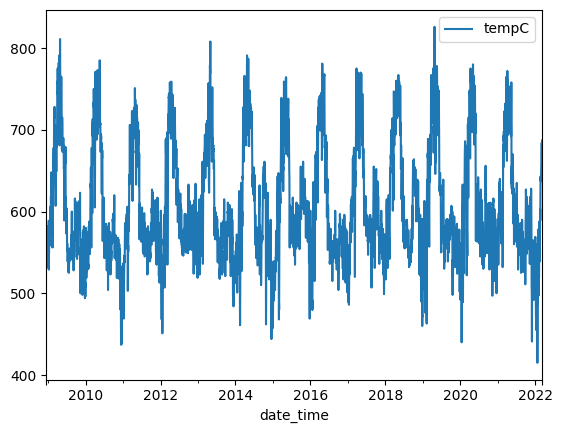

In [58]:
daily_df.plot()

# Prophet

In [65]:
daily_df.reset_index('date_time', inplace=True)

In [67]:
daily_df = daily_df.rename(columns={'date_time': 'ds', 'tempC': 'y'})
daily_df

,ds,y
0,2008-12-11,571
1,2008-12-12,589
2,2008-12-13,586
3,2008-12-14,567
4,2008-12-15,554
...,...,...
4834,2022-03-07,684
4835,2022-03-08,681
4836,2022-03-09,670
4837,2022-03-10,665


In [71]:
# I will reserve only the last year values for testing and classify rest of the values as training

train = daily_df.iloc[:len(daily_df)-365]
test = daily_df.iloc[len(daily_df)-365:]

print("Train set size:", len(train))
print("Test set size:", len(test))

Train set size: 4474
Test set size: 365


In [72]:
train

,ds,y
0,2008-12-11,571
1,2008-12-12,589
2,2008-12-13,586
3,2008-12-14,567
4,2008-12-15,554
...,...,...
4469,2021-03-07,706
4470,2021-03-08,702
4471,2021-03-09,723
4472,2021-03-10,723


In [73]:
test

,ds,y
4474,2021-03-12,703
4475,2021-03-13,704
4476,2021-03-14,723
4477,2021-03-15,721
4478,2021-03-16,732
...,...,...
4834,2022-03-07,684
4835,2022-03-08,681
4836,2022-03-09,670
4837,2022-03-10,665


## Fitting the Model

In [74]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8ph4mq/gds5z4pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c8ph4mq/k3sive0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1176', 'data', 'file=/tmp/tmp9c8ph4mq/gds5z4pw.json', 'init=/tmp/tmp9c8ph4mq/k3sive0t.json', 'output', 'file=/tmp/tmp9c8ph4mq/prophet_modelesu42rt9/prophet_model-20240916112654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [75]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4834,2022-03-07,615.268787,606.284804,696.228211,604.008311,626.350413,35.491077,35.491077,35.491077,1.460214,1.460214,1.460214,34.030863,34.030863,34.030863,0.0,0.0,0.0,650.759864
4835,2022-03-08,615.268482,611.639301,697.965320,603.944051,626.399637,37.524206,37.524206,37.524206,1.147705,1.147705,1.147705,36.376502,36.376502,36.376502,0.0,0.0,0.0,652.792688
4836,2022-03-09,615.268177,612.224641,698.180612,603.853723,626.452586,38.732800,38.732800,38.732800,-0.114347,-0.114347,-0.114347,38.847147,38.847147,38.847147,0.0,0.0,0.0,654.000976
4837,2022-03-10,615.267872,617.479662,697.629602,603.787608,626.505536,40.353022,40.353022,40.353022,-1.090094,-1.090094,-1.090094,41.443116,41.443116,41.443116,0.0,0.0,0.0,655.620894
4838,2022-03-11,615.267567,615.480351,700.835074,603.722685,626.543917,42.795062,42.795062,42.795062,-1.366392,-1.366392,-1.366392,44.161455,44.161455,44.161455,0.0,0.0,0.0,658.062629


In [77]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
4834,2022-03-07,650.759864,606.284804,696.228211
4835,2022-03-08,652.792688,611.639301,697.965320
4836,2022-03-09,654.000976,612.224641,698.180612
4837,2022-03-10,655.620894,617.479662,697.629602
4838,2022-03-11,658.062629,615.480351,700.835074


In [78]:
test.tail()

,ds,y
4834,2022-03-07,684
4835,2022-03-08,681
4836,2022-03-09,670
4837,2022-03-10,665
4838,2022-03-11,687


In [79]:
plot_plotly(m, forecast)

In [80]:
plot_components_plotly(m, forecast)

## Evaluating the model

In [82]:
prediction = forecast.iloc[-365:]['yhat']

In [84]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(prediction,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  37.305593622868805
Mean Value of Test Dataset: 597.9041095890411


- The Root Mean Squared Error (RMSE) and the Mean Value of the Test Dataset gives us insights into the accuracy of our model’s predictions.


- RMSE of 37.31 means that, on average, my model's predictions are off by about 37.31 units from the actual values. RMSE is a measure of the average magnitude of the errors in the predictions. Lower RMSE values indicate better model performance, as the errors are smaller.
Mean Value of Test Dataset:

- The mean value of the test dataset is 597.90. This tells us the average value of the actual data in my test set.